In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from matplotlib.colors import ListedColormap

[['prompt_technik' 'model_name' nan nan nan nan nan nan]
 ['CoT' 'gpt35' 0.96 50.0 0.3910969543753493 0.23647618218791
  0.2980524702655662 0.5803462716211459]
 ['CoT' 'llama-guard-3-8b' 0.62 50.0 0.3889802974941272
  0.0040521010075612 0.2368690889689479 0.315]
 ['CoT' 'llama3-groq-70b-8192-tool-use-preview' 0.46 50.0
  0.3238560291205805 0.1310295267099084 0.1854470908045425
  0.3717607037038866]
 ['CoT' 'gemma2-9b-it' 0.82 50.0 0.40508696709564 0.2549975746688062
  0.326188024548848 0.5583656421222549]
 ['CoT' 'gemma-7b-it' 0.74 50.0 0.381512996729054 0.2169685069939867
  0.3176606818098534 0.4729470634727605]
 ['CoT' 'llama3-70b-8192' 0.9 50.0 0.4138141460590083 0.2649102828123423
  0.3402715054267821 0.574160171434047]
 ['CoT' 'llama3-8b-8192' 0.8 50.0 0.4041069970783848 0.2476733775102441
  0.3387220620889474 0.5505918105901965]
 ['CoT' 'llama-3.1-70b-versatile' 0.5 50.0 0.3897855507258755
  0.2364778501608518 0.3103376761532441 0.5484839736964168]
 ['CoT' 'llama3-groq-8b-8192-to

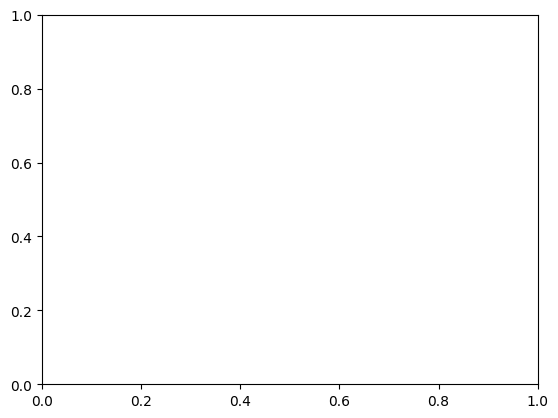

In [6]:
import pandas as pd

# Lade die CSV-Datei
csv_file = 'normals_output.csv'
df = pd.read_csv(csv_file, header=None)

# Erstelle ein DataFrame mit den relevanten Spalten
data = {
    'prompt_technik': df[0],
    'model_name': df[1],
    'Compilable': df[4],
    'Completion': df[2],
    'BLEU-Score': df[5],
    'Bert-Precision': df[6],
    'Bert-Recall': df[7],
    'Bert-F1': df[8]
}
grouped_df = pd.DataFrame(data)

# Konvertiere die relevanten Spalten in numerische Werte
# (Hier wird coercion verwendet, um nicht-konvertierbare Werte als NaN zu setzen)
for col in ['Compilable', 'Completion', 'BLEU-Score', 'Bert-Precision', 'Bert-Recall', 'Bert-F1']:
    grouped_df[col] = pd.to_numeric(grouped_df[col], errors='coerce')

# Überprüfe die Datentypen
print(grouped_df.values)

# Gruppiere die Daten nach 'model_name' und 'prompt_technik' und berechne den Mittelwert
grouped_df = grouped_df.groupby(['model_name', 'prompt_technik']).mean().reset_index()

# ploten Tabelle
fix, ax = plt.subplots()

print(grouped_df)


In [8]:
df[1].unique()

array(['model_name', 'gpt35', 'llama-guard-3-8b',
       'llama3-groq-70b-8192-tool-use-preview', 'gemma2-9b-it',
       'gemma-7b-it', 'llama3-70b-8192', 'llama3-8b-8192',
       'llama-3.1-70b-versatile', 'llama3-groq-8b-8192-tool-use-preview',
       'mixtral-8x7b-32768'], dtype=object)

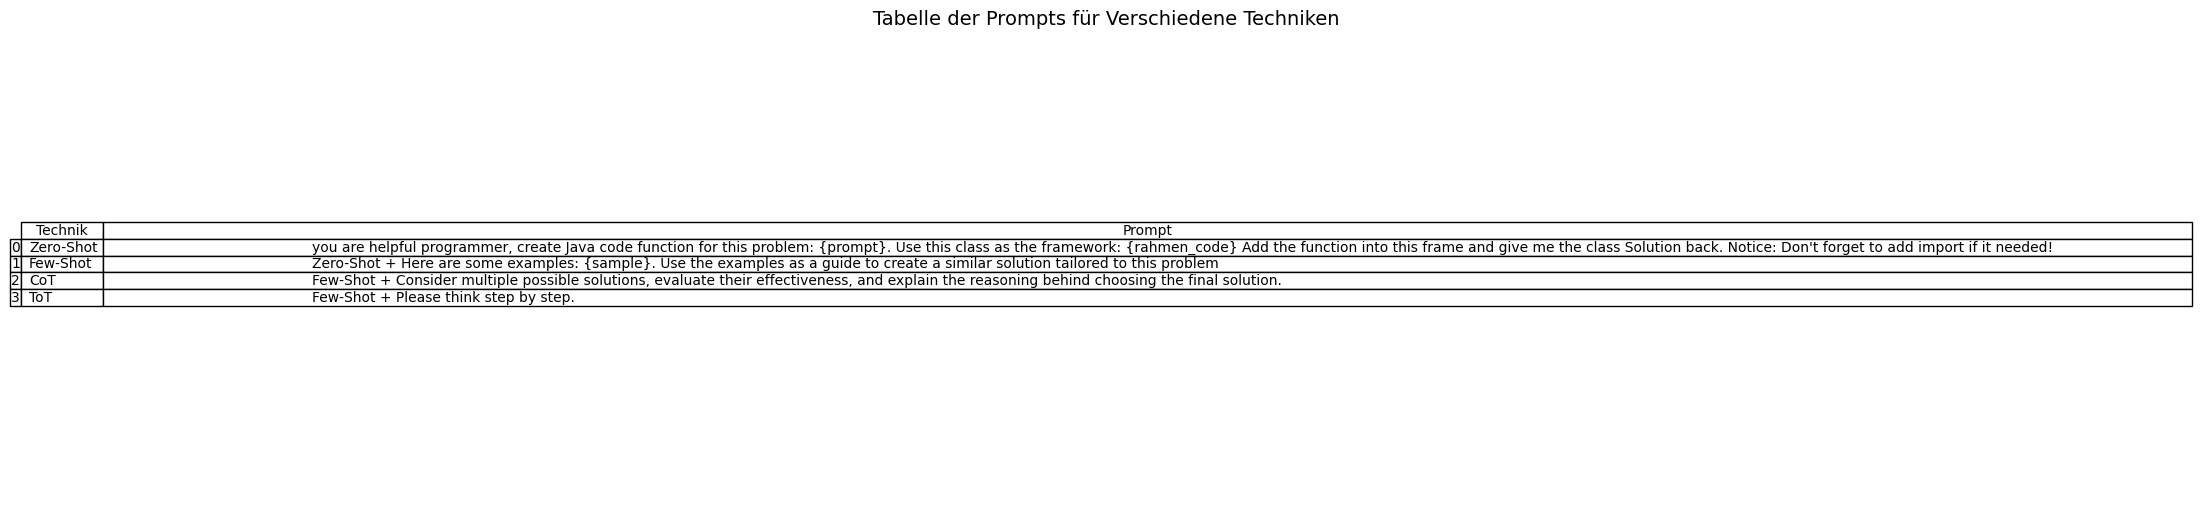

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Daten für die Tabelle
data = {
    "Technik": ["Zero-Shot", "Few-Shot", "CoT", "ToT"],
    "Prompt": [
        "you are helpful programmer, create Java code function for this problem: {prompt}. Use this class as the framework: {rahmen_code} Add the function into this frame and give me the class Solution back. Notice: Don't forget to add import if it needed!",
        "Zero-Shot + Here are some examples: {sample}. Use the examples as a guide to create a similar solution tailored to this problem",
        "Few-Shot + Consider multiple possible solutions, evaluate their effectiveness, and explain the reasoning behind choosing the final solution.",
        "Few-Shot + Please think step by step."
    ]
}

# DataFrame erstellen
df = pd.DataFrame(data)

# Plot erstellen
fig, ax = plt.subplots(figsize=(10, 6))  # Größe der Tabelle anpassen
ax.axis('off')  # Achsen ausblenden
tbl = table(ax, df, loc='center', cellLoc='left', colWidths=[0.3, 0.7])

# Formatierung der Tabelle
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width([0, 1])

# Titel und Anzeigen
plt.title('Tabelle der Prompts für Verschiedene Techniken', fontsize=14)
plt.show()
